In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
# load dataframe
df_TCRA_reads = pd.read_csv("../summary_data/original/all_tools_TRA_reads.csv")
df_TCRA_reads.columns = ['Sample','tissue','tissue_type','repertoire_type','class','TRA_total_reads_tool','total_reads_RNA_seq','tool','TRA_derived_by_RNA_seq_tool']                      

df_TCRB_reads = pd.read_csv("../summary_data/original/all_tools_TRB_reads.csv")
df_TCRB_reads = df_TCRB_reads[['Sample','tissue','tissue_type','repertoire_type','class','total_reads_tool','total_reads_RNA_seq','tool','TCR_derived_by_RNA_seq_tool']]
df_TCRB_reads.columns = ['Sample', 'tissue','tissue_type', 'repertoire_type','class', 'TRB_total_reads_tool','total_reads_RNA_seq','tool','TRB_derived_by_RNA_seq_tool']   

Number of TCRA and TCRB derived reads from RNA-Seq per one million RNA-Seq reads

In [3]:
# prepare the reads dataframe 
df_reads = pd.merge(df_TCRA_reads, df_TCRB_reads, how='outer', on=['Sample','tissue','tissue_type','repertoire_type','class','tool','total_reads_RNA_seq']).fillna(0)
df_reads = df_reads[['Sample','tissue','tissue_type','repertoire_type','class','tool','TRA_derived_by_RNA_seq_tool','TRB_derived_by_RNA_seq_tool']]
df_reads.rename(columns={'TRA_derived_by_RNA_seq_tool':'TRA','TRB_derived_by_RNA_seq_tool':'TRB'}, inplace=True)

In [4]:
df_reads

,Sample,tissue,tissue_type,repertoire_type,class,tool,TRA,TRB
0,MP-11-28-12RNA_S2,PBMC,T_cell_rich,polyclonal,T_cell_rich_polyclonal,MIXCR,3.898845,1.357193
1,CMT-baseline1C_CAGATC,melanoma,T_cell_poor,polyclonal,T_cell_poor_polyclonal,MIXCR,0.703234,1.103349
2,LEK-baseline_CGATGT,melanoma,T_cell_poor,polyclonal,T_cell_poor_polyclonal,MIXCR,0.347437,0.931764
3,LEK-OT110712A_CCGTCC,melanoma,T_cell_poor,polyclonal,T_cell_poor_polyclonal,MIXCR,2.653664,4.519977
4,HM-baseline1C_CGATGT,melanoma,T_cell_poor,polyclonal,T_cell_poor_polyclonal,MIXCR,0.027625,0.000000
5,PT0310_S9,melanoma,T_cell_poor,polyclonal,T_cell_poor_polyclonal,MIXCR,8.930509,13.284133
6,PT0112-B_S3,melanoma,T_cell_poor,polyclonal,T_cell_poor_polyclonal,MIXCR,0.071777,0.215332
7,PT0285-B_S5,melanoma,T_cell_poor,polyclonal,T_cell_poor_polyclonal,MIXCR,0.027799,0.074130
8,JSSBaseline-RNA_GTGAAA,melanoma,T_cell_poor,polyclonal,T_cell_poor_polyclonal,MIXCR,1.146300,1.754541
9,RAS-baseline_TGACCA,melanoma,T_cell_poor,polyclonal,T_cell_poor_polyclonal,MIXCR,0.232426,2.020323


In [5]:
# reshape the dataframe for plotting and calculation
df_reads_melt = pd.melt(df_reads, id_vars=['Sample','tissue','tissue_type','repertoire_type','class','tool'], var_name="chain", value_name="reads_derived_by_RNA_seq_tool")
df_reads_melt

,Sample,tissue,tissue_type,repertoire_type,class,tool,chain,reads_derived_by_RNA_seq_tool
0,MP-11-28-12RNA_S2,PBMC,T_cell_rich,polyclonal,T_cell_rich_polyclonal,MIXCR,TRA,3.898845
1,CMT-baseline1C_CAGATC,melanoma,T_cell_poor,polyclonal,T_cell_poor_polyclonal,MIXCR,TRA,0.703234
2,LEK-baseline_CGATGT,melanoma,T_cell_poor,polyclonal,T_cell_poor_polyclonal,MIXCR,TRA,0.347437
3,LEK-OT110712A_CCGTCC,melanoma,T_cell_poor,polyclonal,T_cell_poor_polyclonal,MIXCR,TRA,2.653664
4,HM-baseline1C_CGATGT,melanoma,T_cell_poor,polyclonal,T_cell_poor_polyclonal,MIXCR,TRA,0.027625
...,...,...,...,...,...,...,...,...
115,SRR5233637,small_intestine,T_cell_poor,polyclonal,T_cell_poor_polyclonal,TRUST4,TRB,7.480710
116,SRR5233639,lymph_node,T_cell_rich,polyclonal,T_cell_rich_polyclonal,TRUST4,TRB,137.184067
117,TCGA-CZ-4862,kidney,T_cell_poor,polyclonal,T_cell_poor_polyclonal,TRUST4,TRB,12.130547
118,TCGA-CZ-5463,kidney,T_cell_poor,polyclonal,T_cell_poor_polyclonal,TRUST4,TRB,2.984528


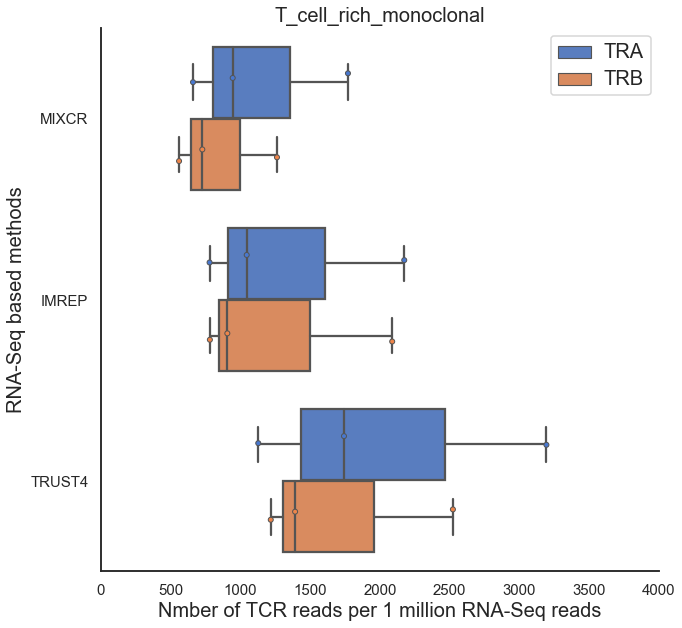

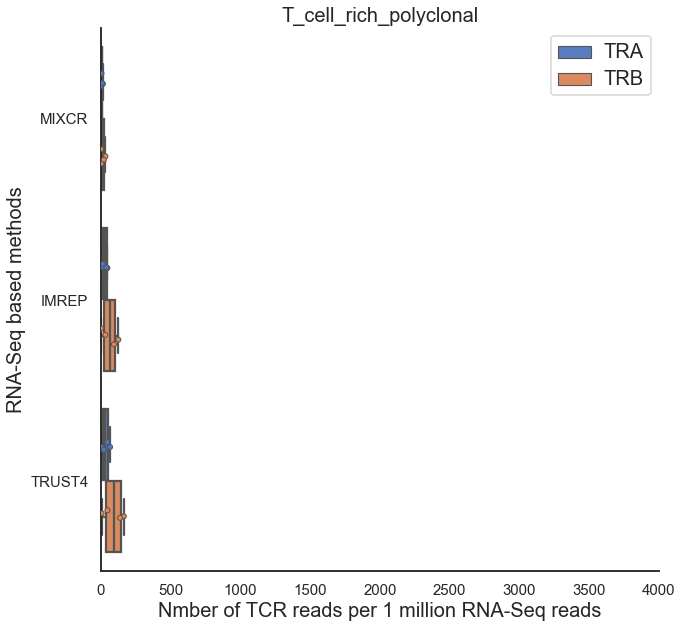

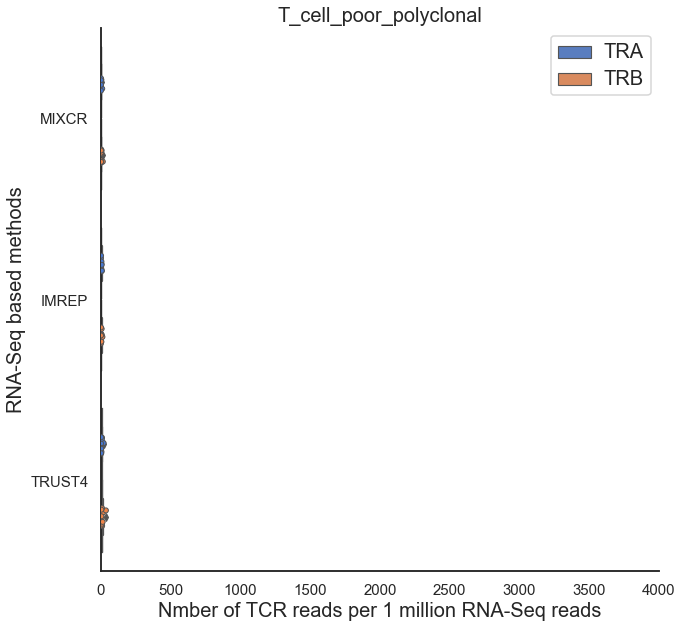

In [15]:
repertoire_classes = ['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_polyclonal']

sns.set_style("white") 
sns.set_context("talk")  

for repertoire_class in repertoire_classes: 
    reads_figure = df_reads_melt.loc[df_reads_melt['class'] == repertoire_class]
    ax = plt.subplots(figsize = (10,10))
    ax = sns.boxplot(x='reads_derived_by_RNA_seq_tool',y='tool',data=reads_figure,palette="muted",hue='chain')
    sns.stripplot(x="reads_derived_by_RNA_seq_tool",y="tool",data=reads_figure,s = 5,color=".3",palette="muted",hue='chain',dodge=True,linewidth=1)
    ax.set(xlim=(0, 4000))
    ax.set_xlabel('Nmber of TCR reads per 1 million RNA-Seq reads',fontsize=20)
    ax.set_ylabel('RNA-Seq based methods',fontsize=20)
    ax.set_title(repertoire_class, fontdict={'fontsize': 20, 'fontweight': 'medium'})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1, 1))
    plt.setp(ax.get_legend().get_texts(), fontsize=20) 
    plt.setp(ax.get_legend().get_title(), fontsize=20)
    sns.despine()
    plt.show()

In [7]:
# Calculate the Pearson correlation for T_cell_rich monoclonal repertoires
T_cell_rich_monoclonal = df_reads.loc[(df_reads['class'] == 'T_cell_rich_monoclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_rich_monoclonal.loc[(T_cell_rich_monoclonal['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['TRA'], correlation['TRB'])))

MIXCR Pearson correlation coefficient:(0.9998032243855184, 0.012629550134746493)
IMREP Pearson correlation coefficient:(0.9956015327350198, 0.05973173328766697)
TRUST4 Pearson correlation coefficient:(0.9854849247084745, 0.10860041601171014)


In [8]:
# Calculate the Pearson correlation for T_cell_rich polyclonal repertoires
T_cell_rich_polyclonal = df_reads.loc[(df_reads['class'] == 'T_cell_rich_polyclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_rich_polyclonal.loc[(T_cell_rich_polyclonal['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['TRA'], correlation['TRB'])))

MIXCR Pearson correlation coefficient:(0.9703375371021556, 0.029662462897844355)
IMREP Pearson correlation coefficient:(0.9854885130676853, 0.014511486932314743)
TRUST4 Pearson correlation coefficient:(0.9849132853514162, 0.015086714648583799)


In [9]:
# Calculate the Pearson correlation for T_cell_poor polyclonal repertoires
T_cell_poor_polyclonal = df_reads.loc[(df_reads['class'] == 'T_cell_poor_polyclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_poor_polyclonal.loc[(T_cell_poor_polyclonal['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['TRA'], correlation['TRB'])))

MIXCR Pearson correlation coefficient:(0.9912567569123962, 5.000454014838305e-11)
IMREP Pearson correlation coefficient:(0.40720733771406026, 0.16727501686695534)
TRUST4 Pearson correlation coefficient:(0.9852543094429327, 8.759571674130589e-10)


In [6]:
repertoire_classes = ['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_polyclonal']
tools = ['MIXCR','IMREP','TRUST4']     

for repertoire_class in repertoire_classes: 
    print(repertoire_class)
    df_repertoire = df_reads_melt.loc[df_reads_melt['class'] == repertoire_class]
    mean_reads = df_repertoire.groupby("chain")["reads_derived_by_RNA_seq_tool"].agg(["mean", "std"])
    display(mean_reads)          
    for tool in tools:  
        print(tool)
        df_tool = df_repertoire.loc[df_repertoire['tool'] == tool]
        mean_reads = df_tool.groupby("chain")["reads_derived_by_RNA_seq_tool"].agg(["mean", "std"]) 
        display(mean_reads)

T_cell_rich_monoclonal


,mean,std
chain,,
TRA,1492.877283,816.528193
TRB,1272.770106,654.592373


MIXCR


,mean,std
chain,,
TRA,1125.008509,576.990621
TRB,849.436733,366.742010


IMREP


,mean,std
chain,,
TRA,1332.553983,740.865797
TRB,1258.189905,721.166385


TRUST4


,mean,std
chain,,
TRA,2021.069358,1060.681885
TRB,1710.683680,708.940058


T_cell_rich_polyclonal


,mean,std
chain,,
TRA,23.015657,20.544970
TRB,55.154813,58.825795


MIXCR


,mean,std
chain,,
TRA,6.985488,5.363849
TRB,14.453684,14.669146


IMREP


,mean,std
chain,,
TRA,27.653043,17.098316
TRB,62.937652,55.764460


TRUST4


,mean,std
chain,,
TRA,34.408440,26.119056
TRB,88.073101,75.027921


T_cell_poor_polyclonal


,mean,std
chain,,
TRA,2.502392,3.655527
TRB,4.136331,6.500959


MIXCR


,mean,std
chain,,
TRA,1.113139,2.462837
TRB,1.927589,3.642657


IMREP


,mean,std
chain,,
TRA,2.379456,2.143955
TRB,2.405759,2.938761


TRUST4


,mean,std
chain,,
TRA,4.014580,5.202803
TRB,8.075644,9.305104


In [7]:
# repertoire_classes = ['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_polyclonal']
# tools = ['MIXCR','IMREP','TRUST4']     

# for repertoire_class in repertoire_classes: 
#     print(repertoire_class +":")
#     df_repertoire = df_reads_melt.loc[df_reads_melt['class'] == repertoire_class]
#     df_group1 = df_repertoire[df_repertoire['chain'] == 'TRA']
#     df_group2 = df_repertoire[df_repertoire['chain'] == 'TRB']
#     display(stats.ttest_ind(df_group1['reads_derived_by_RNA_seq_tool'], df_group2['reads_derived_by_RNA_seq_tool']))        
#     for tool in tools:  
#         print(tool)
#         df_tool = df_repertoire.loc[df_repertoire['tool'] == tool]
#         df_group1 = df_tool[df_tool['chain'] == 'TRA']
#         df_group2 = df_tool[df_tool['chain'] == 'TRB']
#         display(stats.ttest_ind(df_group1['reads_derived_by_RNA_seq_tool'], df_group2['reads_derived_by_RNA_seq_tool']))

T_cell_rich_monoclonal:


Ttest_indResult(statistic=0.6309673184464909, pvalue=0.536971752123331)

MIXCR


Ttest_indResult(statistic=0.6981402922872914, pvalue=0.5235457393911042)

IMREP


Ttest_indResult(statistic=0.12457831905606856, pvalue=0.9068671327811035)

TRUST4


Ttest_indResult(statistic=0.4213886648278967, pvalue=0.695129742791849)

T_cell_rich_polyclonal:


Ttest_indResult(statistic=-1.7867567834825735, pvalue=0.08776572333388956)

MIXCR


Ttest_indResult(statistic=-0.9562932417108985, pvalue=0.3758512475505275)

IMREP


Ttest_indResult(statistic=-1.2098914475270544, pvalue=0.2718208033710567)

TRUST4


Ttest_indResult(statistic=-1.3510012196935226, pvalue=0.22541382256574422)

T_cell_poor_polyclonal:


Ttest_indResult(statistic=-1.3681439832540594, pvalue=0.17529845452000517)

MIXCR


Ttest_indResult(statistic=-0.6678356952439342, pvalue=0.510610178858004)

IMREP


Ttest_indResult(statistic=-0.026070443110353014, pvalue=0.9794167174027926)

TRUST4


Ttest_indResult(statistic=-1.3734690835210932, pvalue=0.18230193124270155)

Number of TCRA and TCRB clonotype

In [10]:
# load dataframe
df_TCRA_diversity = pd.read_csv("../summary_data/original/all_tools_TRA_diversity.csv")
df_TCRA_diversity = df_TCRA_diversity[['Sample','shannon_index_tool','clonotype_count_tool','shannon_index_TCR','tool','repertoire_type','tissue_type','class']]
df_TCRA_diversity.columns = ['Sample', 'TRA_shannon_index','TRA_clonotype_count','TRA_shannon_index','tool','repertoire_type','tissue_type','class']

df_TCRB_diversity = pd.read_csv("../summary_data/original/all_tools_TRB_diversity.csv")
df_TCRB_diversity = df_TCRB_diversity[['Sample','shannon_index_tool','clonotype_count_tool','shannon_index_TCR','tool','repertoire_type','tissue_type','class']]
df_TCRB_diversity.columns = ['Sample', 'TRB_shannon_index','TRB_clonotype_count','TRB_shannon_index','tool','repertoire_type','tissue_type','class']

# merge dataframe
df_diversity = pd.merge(df_TCRA_diversity, df_TCRB_diversity, how='outer', on=['Sample','tool','repertoire_type','tissue_type','class']).fillna(0)
df_diversity["repertoire_type"].replace({0: "polyclonal"}, inplace=True)
df_diversity = df_diversity.fillna(0)
df_diversity

/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Sample,TRA_shannon_index,TRA_clonotype_count,TRA_shannon_index,tool,repertoire_type,tissue_type,class,TRB_shannon_index,TRB_clonotype_count,TRB_shannon_index
0,CMT-baseline1C_CAGATC,3.092193,23,8.172351,MIXCR,polyclonal,T_cell_poor,T_cell_poor_polyclonal,3.438804,34.0,8.172351
1,CMT-baseline1C_CAGATC,4.125943,65,8.172351,IMREP,polyclonal,T_cell_poor,T_cell_poor_polyclonal,4.406335,92.0,8.172351
2,CMT-baseline1C_CAGATC,4.938231,160,8.172351,TRUST4,polyclonal,T_cell_poor,T_cell_poor_polyclonal,5.024401,200.0,8.172351
3,ESO1-sorted-T-cells_S13_L007,0.535771,2215,1.072675,MIXCR,monoclonal,T_cell_rich,T_cell_rich_monoclonal,0.829164,2592.0,1.072675
4,ESO1-sorted-T-cells_S13_L007,0.824119,2953,1.072675,IMREP,monoclonal,T_cell_rich,T_cell_rich_monoclonal,1.163479,3682.0,1.072675
5,ESO1-sorted-T-cells_S13_L007,0.958934,3427,1.072675,TRUST4,monoclonal,T_cell_rich,T_cell_rich_monoclonal,1.165598,4154.0,1.072675
6,HM-baseline1C_CGATGT,0.000000,1,4.680209,MIXCR,polyclonal,T_cell_poor,T_cell_poor_polyclonal,0.000000,0.0,0.000000
7,HM-baseline1C_CGATGT,0.764754,3,4.680209,IMREP,polyclonal,T_cell_poor,T_cell_poor_polyclonal,0.000000,1.0,4.680209
8,HM-baseline1C_CGATGT,1.078992,3,4.680209,TRUST4,polyclonal,T_cell_poor,T_cell_poor_polyclonal,0.970585,4.0,4.680209
9,INY1-sorted-T-cells_S14_L007,0.780964,1414,1.001202,MIXCR,monoclonal,T_cell_rich,T_cell_rich_monoclonal,0.988740,1565.0,1.001202


In [11]:
# prepare the clonotype dataframe
df_clonotype = df_diversity[['Sample','repertoire_type','tissue_type','class','tool','TRA_clonotype_count','TRB_clonotype_count']]
df_clonotype.rename(columns={'TRA_clonotype_count':'TRA','TRB_clonotype_count':'TRB'}, inplace=True)

/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [12]:
# reshape the dataframe for plotting and calculation
df_clonotype_melt = pd.melt(df_clonotype, id_vars=['Sample','repertoire_type','tissue_type','class','tool'], var_name="chain", value_name="clonotype_counts")
df_clonotype_melt

,Sample,repertoire_type,tissue_type,class,tool,chain,clonotype_counts
0,CMT-baseline1C_CAGATC,polyclonal,T_cell_poor,T_cell_poor_polyclonal,MIXCR,TRA,23.0
1,CMT-baseline1C_CAGATC,polyclonal,T_cell_poor,T_cell_poor_polyclonal,IMREP,TRA,65.0
2,CMT-baseline1C_CAGATC,polyclonal,T_cell_poor,T_cell_poor_polyclonal,TRUST4,TRA,160.0
3,ESO1-sorted-T-cells_S13_L007,monoclonal,T_cell_rich,T_cell_rich_monoclonal,MIXCR,TRA,2215.0
4,ESO1-sorted-T-cells_S13_L007,monoclonal,T_cell_rich,T_cell_rich_monoclonal,IMREP,TRA,2953.0
...,...,...,...,...,...,...,...
109,TCGA-CZ-4862,polyclonal,T_cell_poor,T_cell_poor_polyclonal,TRUST4,TRB,67.0
110,TCGA-CZ-5463,polyclonal,T_cell_poor,T_cell_poor_polyclonal,IMREP,TRB,4.0
111,TCGA-CZ-5463,polyclonal,T_cell_poor,T_cell_poor_polyclonal,TRUST4,TRB,24.0
112,TCGA-CZ-5985,polyclonal,T_cell_poor,T_cell_poor_polyclonal,IMREP,TRB,2.0


In [13]:
# Calculate the Pearson correlation for T_cell_rich monoclonal repertoires
T_cell_rich_monoclonal = df_clonotype.loc[(df_clonotype['class'] == 'T_cell_rich_monoclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_rich_monoclonal.loc[(T_cell_rich_monoclonal['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['TRA'], correlation['TRB'])))

MIXCR Pearson correlation coefficient:(0.9980533485557745, 0.03972918863155259)
IMREP Pearson correlation coefficient:(0.9428970006615967, 0.2161788437323265)
TRUST4 Pearson correlation coefficient:(0.9971115161550358, 0.04839881019678433)


In [14]:
# Calculate the Pearson correlation for T_cell_rich polyclonal repertoires
T_cell_rich_polyclonal = df_clonotype.loc[(df_clonotype['class'] == 'T_cell_rich_polyclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_rich_polyclonal.loc[(T_cell_rich_polyclonal['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['TRA'], correlation['TRB'])))

MIXCR Pearson correlation coefficient:(0.999788815876631, 0.0002111841233689571)
IMREP Pearson correlation coefficient:(0.9993841007215575, 0.0006158992784425221)
TRUST4 Pearson correlation coefficient:(0.9915705987914507, 0.008429401208549292)


In [15]:
# Calculate the Pearson correlation for T_cell_poor polyclonal repertoires
T_cell_poor_polyclonal = df_clonotype.loc[(df_clonotype['class'] == 'T_cell_poor_polyclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_poor_polyclonal.loc[(T_cell_poor_polyclonal['tool'] == tool)]
    print(tool + ' Pearson correlation coefficient:' + str(stats.pearsonr(correlation['TRA'], correlation['TRB'])))

MIXCR Pearson correlation coefficient:(0.9567834450699086, 1.4483584426387359e-05)
IMREP Pearson correlation coefficient:(0.35116097569126453, 0.23939642842040923)
TRUST4 Pearson correlation coefficient:(0.9621357337744791, 1.4989100752126704e-07)


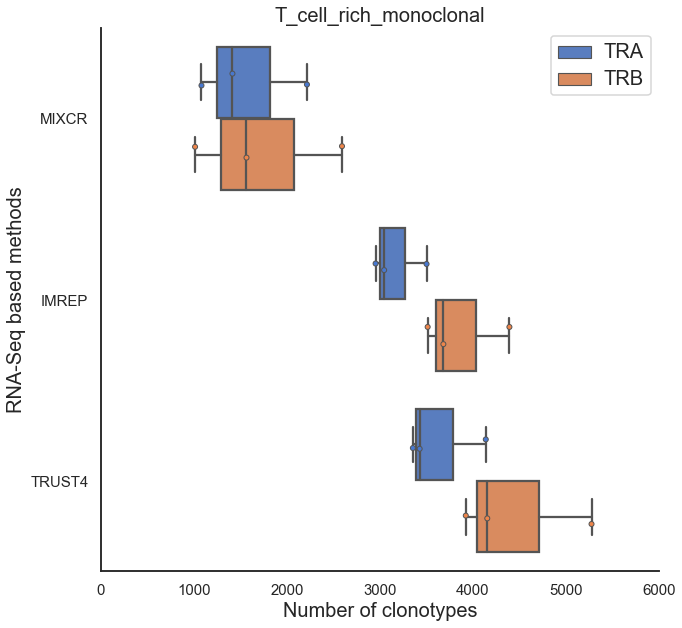

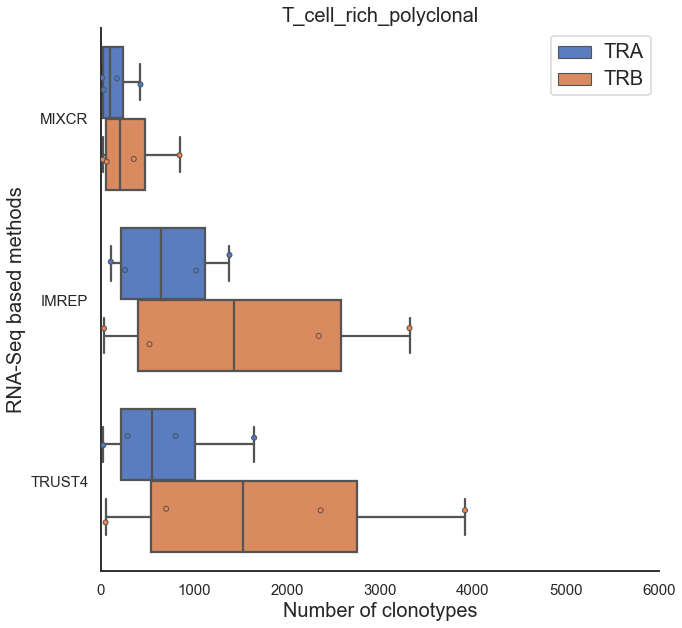

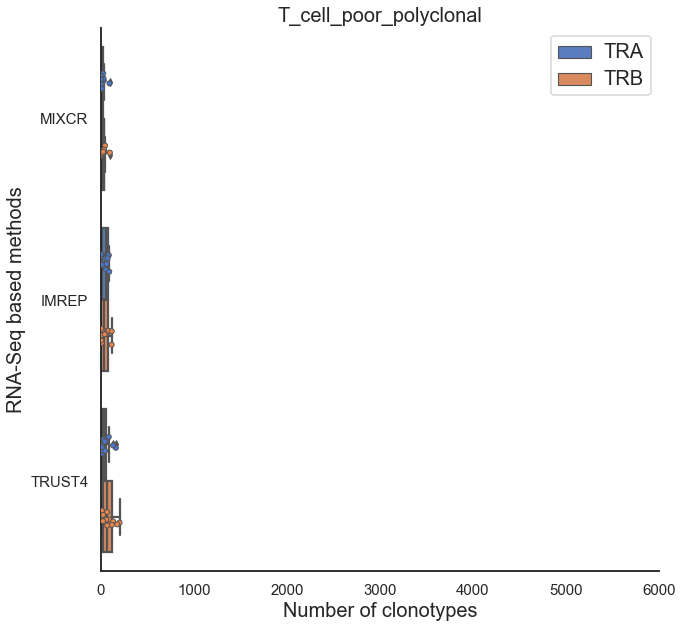

In [16]:
repertoire_classes = ['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_polyclonal']

sns.set_style("white") 
sns.set_context("talk")  

for repertoire_class in repertoire_classes: 
    clonotype_figure = df_clonotype_melt.loc[df_clonotype_melt['class'] == repertoire_class]
    ax = plt.subplots(figsize = (10,10))
    ax = sns.boxplot(x='clonotype_counts',y='tool',data=clonotype_figure,palette="muted",hue='chain')
    sns.stripplot(x="clonotype_counts",y="tool",data=clonotype_figure,s = 5,color=".3",palette="muted",hue='chain',dodge=True,linewidth=1)
    ax.set(xlim=(0, 6000))
    ax.set_xlabel('Number of clonotypes',fontsize=20)
    ax.set_ylabel('RNA-Seq based methods',fontsize=20)
    ax.set_title(repertoire_class, fontdict={'fontsize': 20, 'fontweight': 'medium'})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1, 1))
    plt.setp(ax.get_legend().get_texts(), fontsize=20) 
    plt.setp(ax.get_legend().get_title(), fontsize=20)
    sns.despine()
    plt.show()

In [17]:
repertoire_classes = ['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_polyclonal']
tools = ['MIXCR','IMREP','TRUST4']     

for repertoire_class in repertoire_classes: 
    print(repertoire_class)
    df_repertoire = df_clonotype_melt.loc[df_clonotype_melt['class'] == repertoire_class]
    mean_clonotype = df_repertoire.groupby("chain")["clonotype_counts"].agg(["mean", "std"])
    display(mean_clonotype)          
    for tool in tools:  
        print(tool)
        df_tool = df_repertoire.loc[df_repertoire['tool'] == tool]
        mean_clonotype = df_tool.groupby("chain")["clonotype_counts"].agg(["mean", "std"]) 
        display(mean_clonotype)

T_cell_rich_monoclonal


,mean,std
chain,,
TRA,2792.000000,1017.517199
TRB,3345.333333,1375.216528


MIXCR


,mean,std
chain,,
TRA,1570.0,582.873057
TRB,1723.0,801.762434


IMREP


,mean,std
chain,,
TRA,3166.333333,293.457549
TRB,3862.333333,466.422913


TRUST4


,mean,std
chain,,
TRA,3639.666667,433.110071
TRB,4450.666667,723.176558


T_cell_rich_polyclonal


,mean,std
chain,,
TRA,514.166667,565.152567
TRB,1210.250000,1395.911180


MIXCR


,mean,std
chain,,
TRA,160.0,190.478345
TRB,320.0,380.034209


IMREP


,mean,std
chain,,
TRA,692.50,610.484780
TRB,1553.75,1539.600029


TRUST4


,mean,std
chain,,
TRA,690.0,715.037062
TRB,1757.0,1737.044808


T_cell_poor_polyclonal


,mean,std
chain,,
TRA,38.222222,39.613209
TRB,51.055556,51.369777


MIXCR


,mean,std
chain,,
TRA,19.6,27.853585
TRB,29.5,28.000992


IMREP


,mean,std
chain,,
TRA,43.769231,33.533948
TRB,43.615385,43.725543


TRUST4


,mean,std
chain,,
TRA,47.000000,49.645409
TRB,75.076923,64.221572


In [18]:
# repertoire_classes = ['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_polyclonal']
# tools = ['MIXCR','IMREP','TRUST4']     

# for repertoire_class in repertoire_classes: 
#     print(repertoire_class +":")
#     df_repertoire = df_clonotype_melt.loc[df_clonotype_melt['class'] == repertoire_class]
#     df_group1 = df_repertoire[df_repertoire['chain'] == 'TRA']
#     df_group2 = df_repertoire[df_repertoire['chain'] == 'TRB']
#     display(stats.ttest_ind(df_group1['clonotype_counts'], df_group2['clonotype_counts']))        
#     for tool in tools:  
#         print(tool)
#         df_tool = df_repertoire.loc[df_repertoire['tool'] == tool]
#         df_group1 = df_tool[df_tool['chain'] == 'TRA']
#         df_group2 = df_tool[df_tool['chain'] == 'TRB']
#         display(stats.ttest_ind(df_group1['clonotype_counts'], df_group2['clonotype_counts']))

T_cell_rich_monoclonal:


Ttest_indResult(statistic=-0.9703518584976045, pvalue=0.3463124689705537)

MIXCR


Ttest_indResult(statistic=-0.26734473406888715, pvalue=0.802422109053357)

IMREP


Ttest_indResult(statistic=-2.187613479707764, pvalue=0.09394205246113739)

TRUST4


Ttest_indResult(statistic=-1.6663969234664158, pvalue=0.17096286795439314)

T_cell_rich_polyclonal:


Ttest_indResult(statistic=-1.6011559794217416, pvalue=0.1236052512237619)

MIXCR


Ttest_indResult(statistic=-0.7527682419705852, pvalue=0.48007101072409786)

IMREP


Ttest_indResult(statistic=-1.0400197426672964, pvalue=0.3384134218107499)

TRUST4


Ttest_indResult(statistic=-1.1360384643162988, pvalue=0.2992709713560093)

T_cell_poor_polyclonal:


Ttest_indResult(statistic=-1.1869973435802212, pvalue=0.23924135558871482)

MIXCR


Ttest_indResult(statistic=-0.7926654136512112, pvalue=0.43829621918833284)

IMREP


Ttest_indResult(statistic=0.010066426899350334, pvalue=0.9920515001430037)

TRUST4


Ttest_indResult(statistic=-1.2471218821200625, pvalue=0.2243863551687125)

SDI between TCRA and TCRB chains

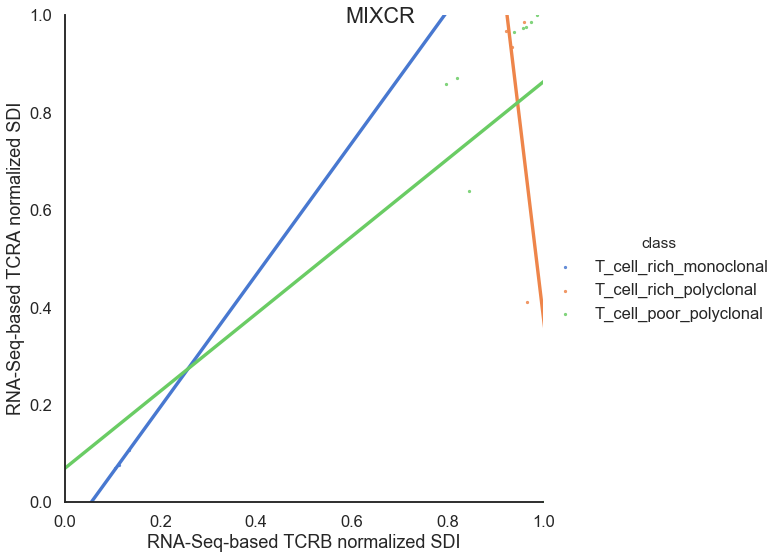

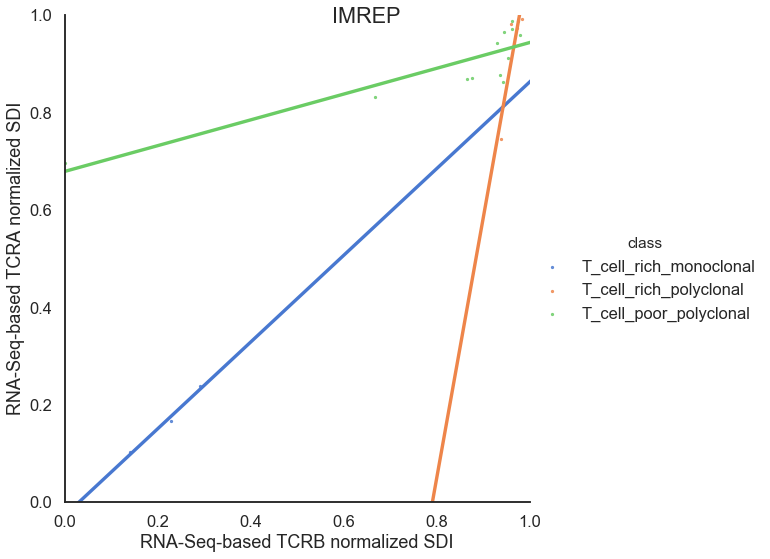

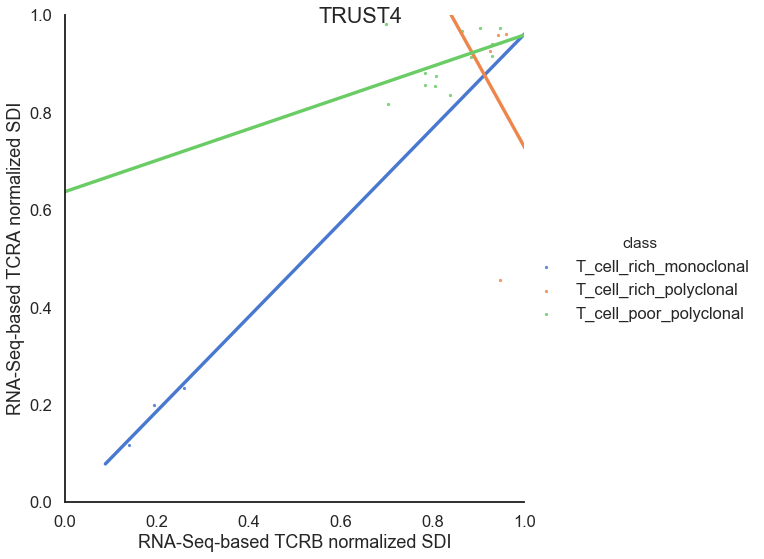

In [17]:
# tools = ['MIXCR','IMREP','TRUST4'] 
# for tool in tools: 
#     diversity_figure = df_diversity.loc[(df_diversity['tool'] == tool)]
#     g = sns.set_style("white")
#     g = sns.set_context("talk")
#     g = sns.lmplot(data=diversity_figure,x="TRB_normalized_shannon_index",y="TRA_normalized_shannon_index",hue="class",ci=None,scatter_kws={"s": 5},palette="muted",hue_order=['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_polyclonal'],height=8)
#     g.set_axis_labels("RNA-Seq-based TCRB normalized SDI","RNA-Seq-based TCRA normalized SDI")
#     g.fig.suptitle(tool)
#     g.set(ylim=(0, 1))
#     g.set(xlim=(0, 1))

In [18]:
# Calculate the Pearson correlation for T_cell_rich monoclonal repertoires
T_cell_rich_monoclonal = df_diversity.loc[(df_diversity['class'] == 'T_cell_rich_monoclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_rich_monoclonal.loc[(T_cell_rich_monoclonal['tool'] == tool)]
    print(tool + ' Pearson correlation cofficient:' + str(stats.pearsonr(correlation['TRB_normalized_shannon_index'], correlation['TRA_normalized_shannon_index'])))

MIXCR Pearson correlation cofficient:(0.992057045423792, 0.08029232704847375)
IMREP Pearson correlation cofficient:(0.9910191044188911, 0.0853847891340616)
TRUST4 Pearson correlation cofficient:(0.9612546327721204, 0.17779409033580026)


In [19]:
# Calculate the Pearson correlation for T_cell_rich polyclonal repertoires
T_cell_rich_polyclonal = df_diversity.loc[(df_diversity['class'] == 'T_cell_rich_polyclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_rich_polyclonal.loc[(T_cell_rich_polyclonal['tool'] == tool)]
    print(tool + ' Pearson correlation cofficient:' + str(stats.pearsonr(correlation['TRB_normalized_shannon_index'], correlation['TRA_normalized_shannon_index'])))

MIXCR Pearson correlation cofficient:(-0.6219811932678698, 0.3780188067321302)
IMREP Pearson correlation cofficient:(0.8691165433656508, 0.1308834566343492)
TRUST4 Pearson correlation cofficient:(-0.10255573884051786, 0.8974442611594822)


In [20]:
# Calculate the Pearson correlation for T_cell_poor polyclonal repertoires
T_cell_poor_polyclonal = df_diversity.loc[(df_diversity['class'] == 'T_cell_poor_polyclonal')]

tools = ['MIXCR','IMREP','TRUST4']              
for tool in tools: 
    correlation = T_cell_poor_polyclonal.loc[(T_cell_poor_polyclonal['tool'] == tool)]
    print(tool + ' Pearson correlation cofficient:' + str(stats.pearsonr(correlation['TRB_normalized_shannon_index'], correlation['TRA_normalized_shannon_index'])))

MIXCR Pearson correlation cofficient:(0.5990699346648071, 0.06722273267242343)
IMREP Pearson correlation cofficient:(0.8641375181927528, 0.0001392251305936291)
TRUST4 Pearson correlation cofficient:(0.46034155842228075, 0.11343291331906169)


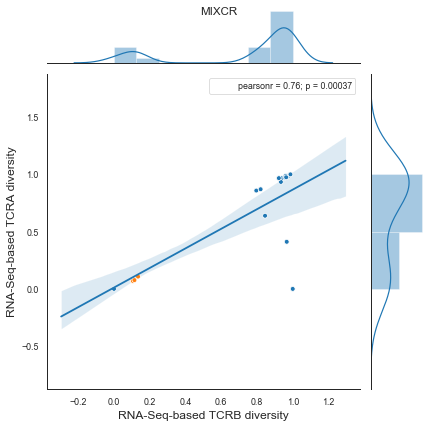

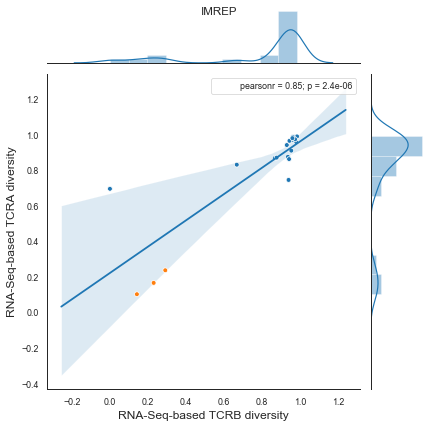

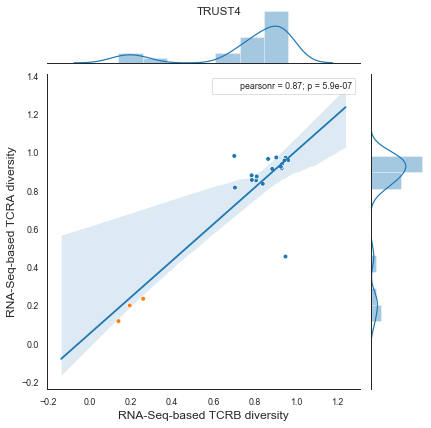

In [71]:
# tools = ['MIXCR','IMREP','TRUST4']              
# for tool in tools: 
#     figure_normalized_SDI = df_diversity.loc[(df_diversity['tool'] == tool)]
#     g = sns.jointplot(data=figure_normalized_SDI, x="TRB_normalized_shannon_index", y="TRA_normalized_shannon_index",kind="reg",scatter = False)
#     sns.scatterplot(data=figure_normalized_SDI,x="TRB_normalized_shannon_index", y="TRA_normalized_shannon_index",hue="repertoire_type")
#     g.annotate(stats.pearsonr)
#     g.fig.suptitle(tool)
#     g.set_axis_labels('x', 'y', fontsize=12)
#     g.ax_joint.set_xlabel('RNA-Seq-based TCRB diversity')
#     g.ax_joint.set_ylabel('RNA-Seq-based TCRA diversity')